<a href="https://colab.research.google.com/github/anpham1331/ECGR4105-Intro-to-ML/blob/main/ECGR_4105_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#https://github.com/anpham1331/ECGR4105-Intro-to-ML/tree/main

#uses Housing.csv for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path_file = "/content/drive/MyDrive/Colab Notebooks/Housing.csv"
housing = pd.read_csv(path_file)

# Checking Null values
housing.isnull().sum()*100/housing.shape[0] #There are no NULL values in the dataset, hence it is clean.

# List of variables to map. yes = 1, no = 0
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
print(df_train.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


<ipython-input-110-77d73a27a124>:24: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-110-77d73a27a124>:25: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_b_val)) * np.sum(np.square(X_b_val.dot(theta) - y_test))
<ipython-input-110-77d73a27a124>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


[8.930789052404336e+24, 3.4531616963276876e+36, 1.335192851496e+48, 5.162630966809051e+59, 1.996172947570309e+71, 7.718363877312775e+82, 2.984367712983873e+94, 1.1539298726871452e+106, 4.461763023660503e+117, 1.725176698385155e+129, 6.670534998986464e+140, 2.5792162167709377e+152, 9.972747753913228e+163, 3.856043441278273e+175, 1.4909703311397483e+187, 5.7649571696787e+198, 2.229067237228261e+210, 8.618868452688533e+221, 3.3325550779311346e+233, 1.2885593286877763e+245, 4.9823186855746357e+256, 1.9264537481487577e+268, 7.44878896346303e+279, 2.8801343959348586e+291, 1.1136272190466962e+303, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

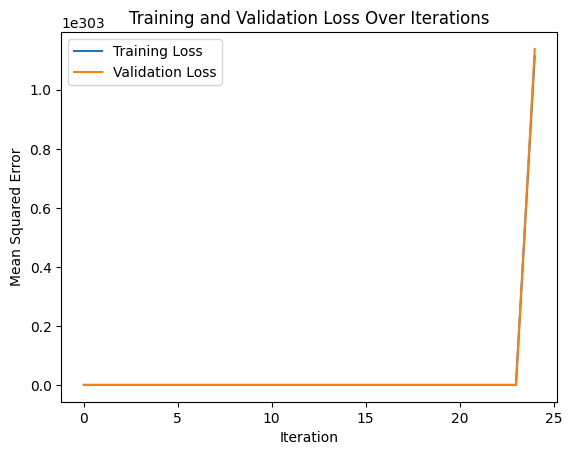

In [110]:
#Problem 1a
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_b_val)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

print(train_losses)
print(val_losses)
#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

<ipython-input-111-9b3c50420d91>:24: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-111-9b3c50420d91>:25: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))
<ipython-input-111-9b3c50420d91>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


[8.930789692657152e+24, 3.453162168607526e+36, 1.3351931209969746e+48, 5.162632344824178e+59, 1.9961736102956738e+71, 7.718366942080917e+82, 2.98436909221456e+94, 1.1539304810719865e+106, 4.461765666387269e+117, 1.7251778324859355e+129, 6.670539818176411e+140, 2.579218247997038e+152, 9.972756256808509e+163, 3.856046979930776e+175, 1.4909717964160565e+187, 5.764963210453498e+198, 2.2290697180034467e+210, 8.618878605695562e+221, 3.332559220545737e+233, 1.2885610143186521e+245, 4.982325527436572e+256, 1.9264565189776414e+268, 7.448800161841086e+279, 2.8801389133085215e+291, 1.1136290381971668e+303, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

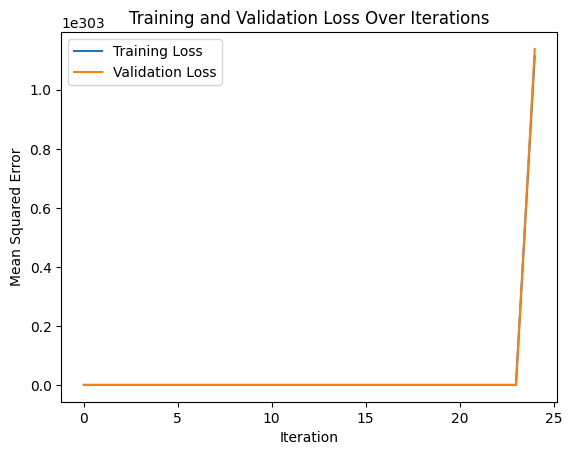

In [111]:
#Problem 1b
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

print(train_losses)
print(val_losses)
#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


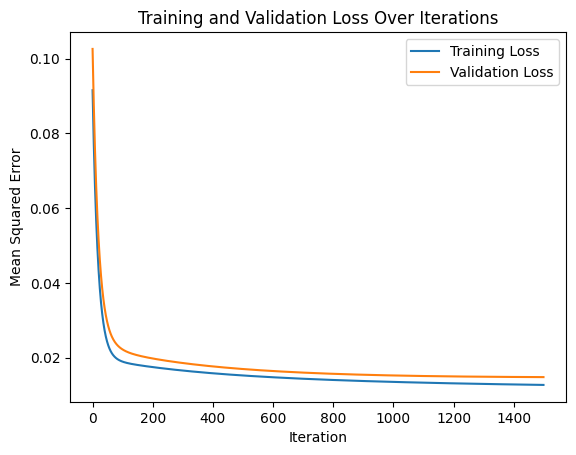

In [112]:
#Problem 2a - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

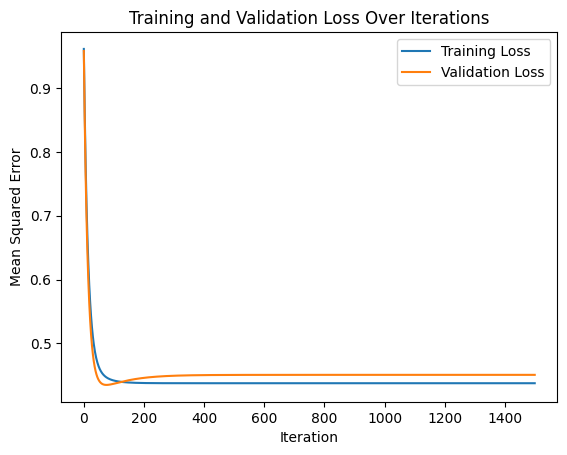

In [113]:
#Problem 2a - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

[0.08789617443474439, 0.08093133160873632, 0.07464512877718346, 0.0689711688062402, 0.06384955240238283, 0.059226242200481505, 0.05505248908556516, 0.05128431465776111, 0.047882044345941926, 0.04480988621332943, 0.042035550983399554, 0.039529909252051534, 0.03726668224679748, 0.03522216284988347, 0.033374963923553984, 0.03170579126552791, 0.030197238784243404, 0.028833603719327677, 0.027600719945560192, 0.02648580759058312, 0.025477337369809568, 0.024564908198226904, 0.02373913677974822, 0.02299155800192571, 0.022314535078556314, 0.021701178486199412, 0.021145272833987896, 0.020641210890338765, 0.020183934066151155, 0.019768878722626025, 0.01939192773367924, 0.019049366788705783, 0.01873784497177952, 0.018454339198773727, 0.018196122134846206, 0.017960733251681973, 0.01774595271722039, 0.01754977784066491, 0.017370401822702018, 0.017206194585329414, 0.017055685477772076, 0.016917547674882207, 0.016790584102387894, 0.016673714739564853, 0.016565965164529618, 0.016466456220544483, 0.0163

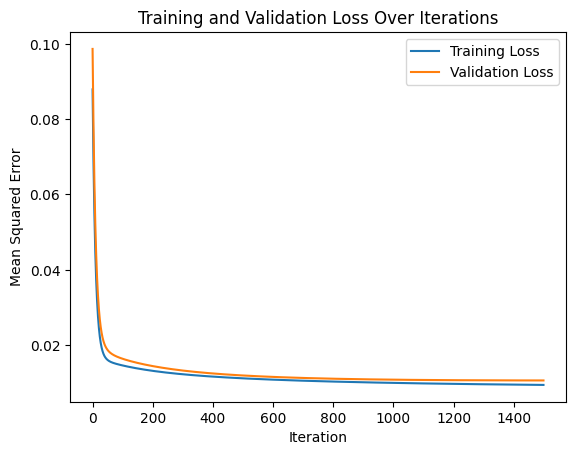

In [114]:
#Problem 2b - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

print(train_losses)
print(val_losses)
#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

[0.9582218446339312, 0.919527938888653, 0.8836824364414565, 0.8504678158469585, 0.8196834412681799, 0.7911442372509265, 0.764679468433764, 0.740131615818555, 0.7173553418998525, 0.6962165375702642, 0.676591444287661, 0.6583658455128605, 0.6414343219069455, 0.6256995652190809, 0.6110717462017541, 0.5974679322636557, 0.5848115509136309, 0.5730318953646713, 0.5620636689570576, 0.5518465653265556, 0.5423248814888895, 0.5334471612373309, 0.5251658664577245, 0.5174370741560925, 0.5102201971694834, 0.5034777266921567, 0.49717499489770883, 0.4912799560743433, 0.48576298481616736, 0.4805966899290111, 0.4757557428156464, 0.4712167192031554, 0.4669579531652641, 0.4629594024753287, 0.4592025244019314, 0.4556701611292266, 0.4523464340487807, 0.4492166462291006, 0.4462671924237732, 0.44348547602951693, 0.4408598324518147, 0.43837945837849507, 0.4360343465009274, 0.433815225258689, 0.43171350321687996, 0.4297212177159429, 0.4278309874620998, 0.4260359687525342, 0.42432981505341294, 0.4227066396709068

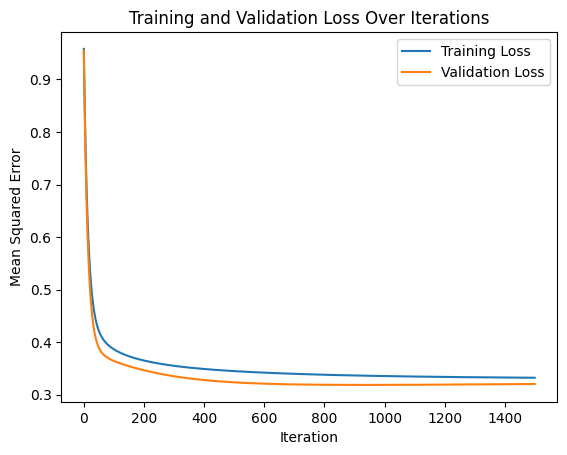

In [115]:
#Problem 2b - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

print(train_losses)
print(val_losses)
#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

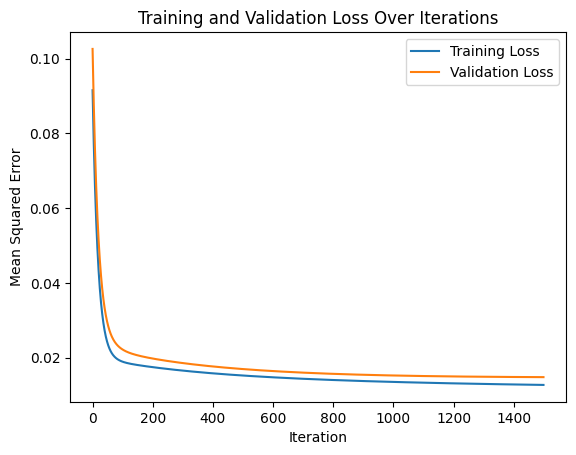

In [116]:
#Problem 3a - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


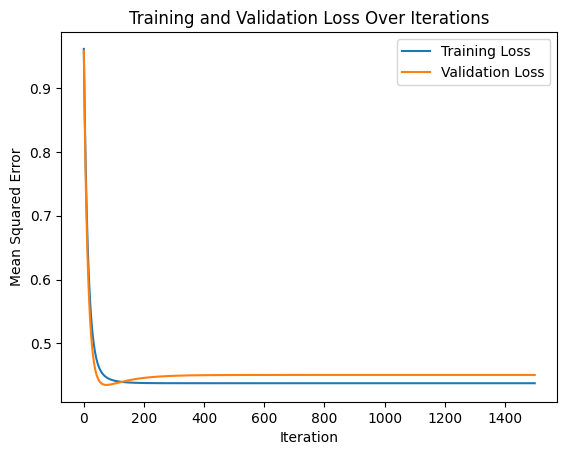

In [117]:
#Problem 3a - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()




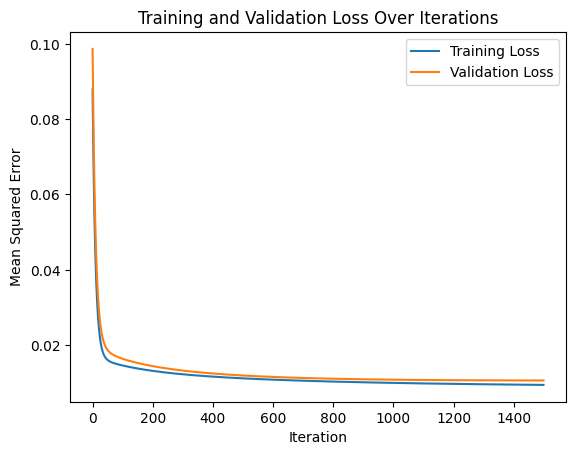

In [118]:
#Problem 3b - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

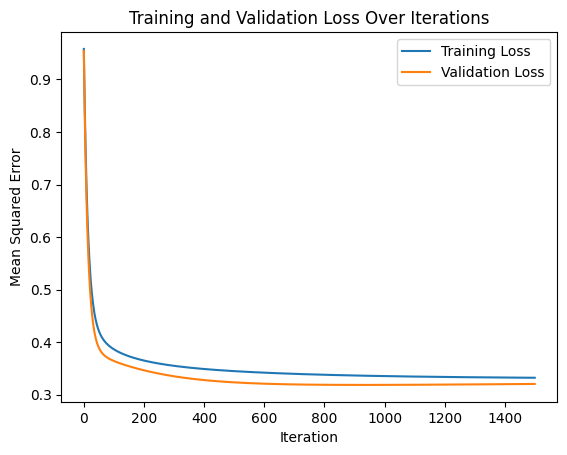

In [119]:
#Problem 3b - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()